,Feature,Missing Count,Missing %
CS%,CS%,2651,92.89
Save%,Save%,2648,92.78
PSxG/SoT,PSxG/SoT,2648,92.78
AvgDist,AvgDist,2646,92.71
Cmp%_stats_keeper_adv,Cmp%_stats_keeper_adv,2644,92.64
...,...,...,...
Nation_stats_passing,Nation_stats_passing,7,0.25
Nation_stats_possession,Nation_stats_possession,7,0.25
Nation_stats_defense,Nation_stats_defense,7,0.25
Nation_stats_passing_types,Nation_stats_passing_types,7,0.25


2854
160
2642


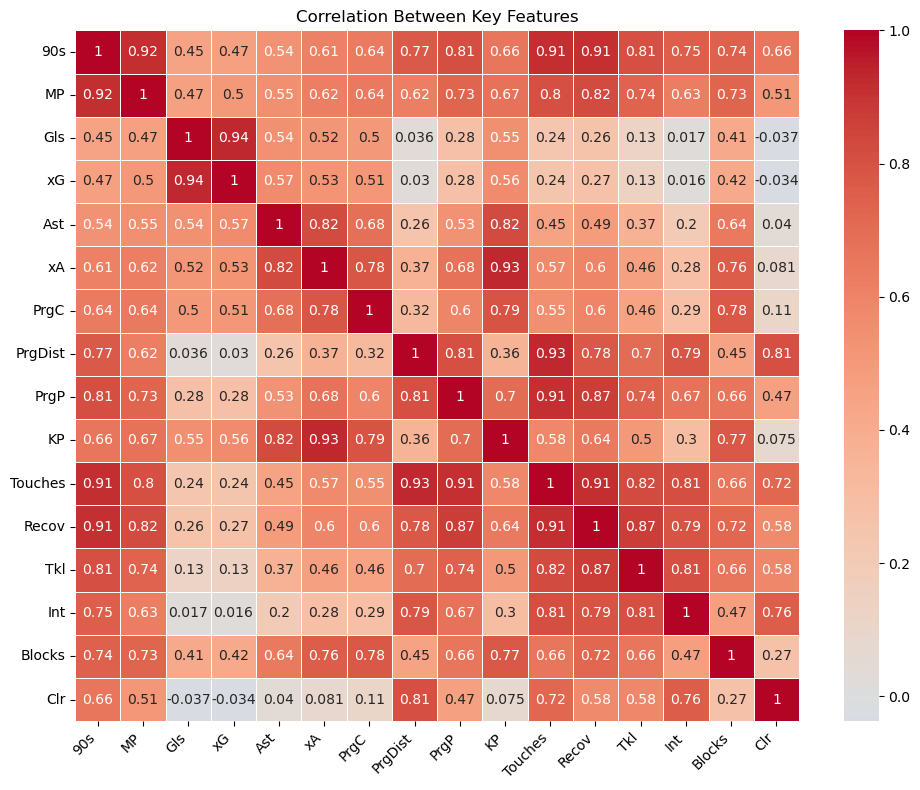

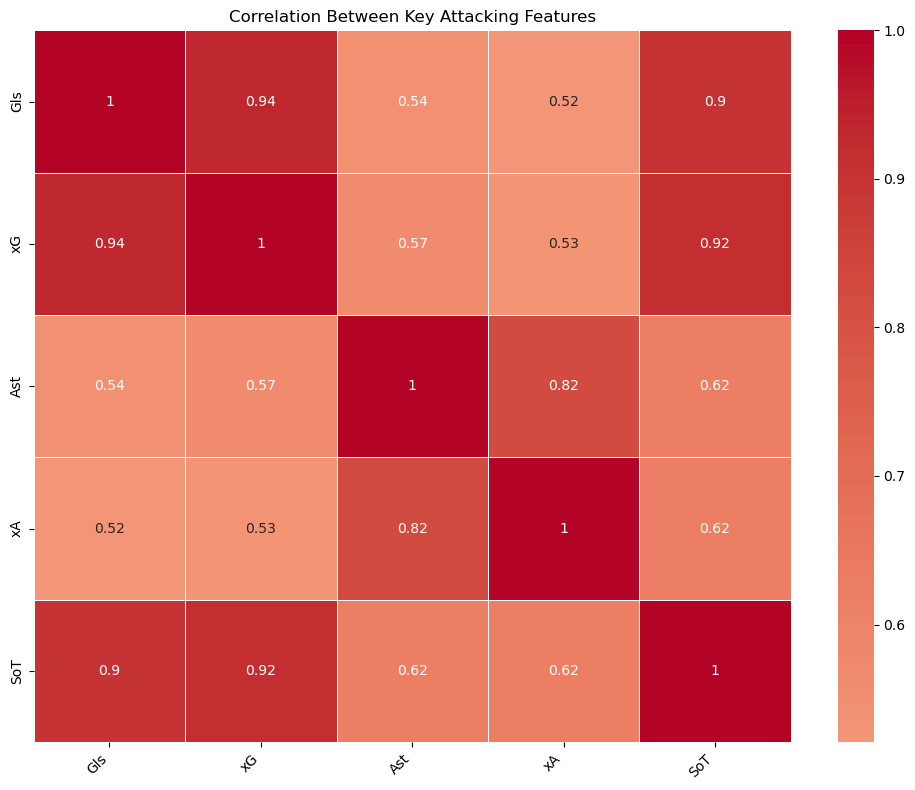

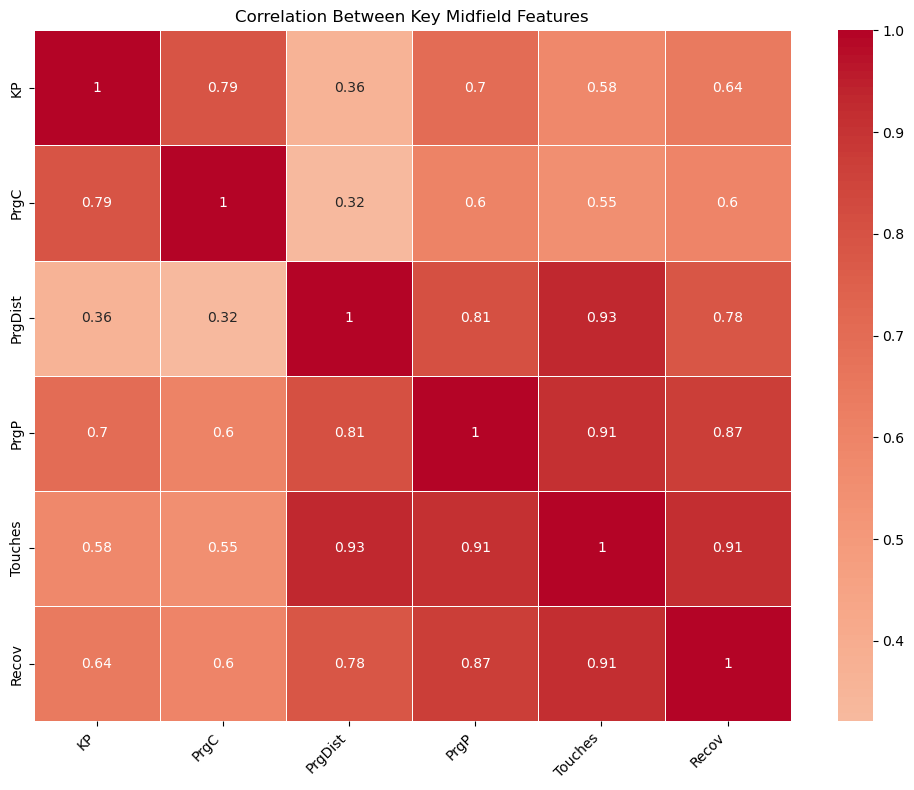

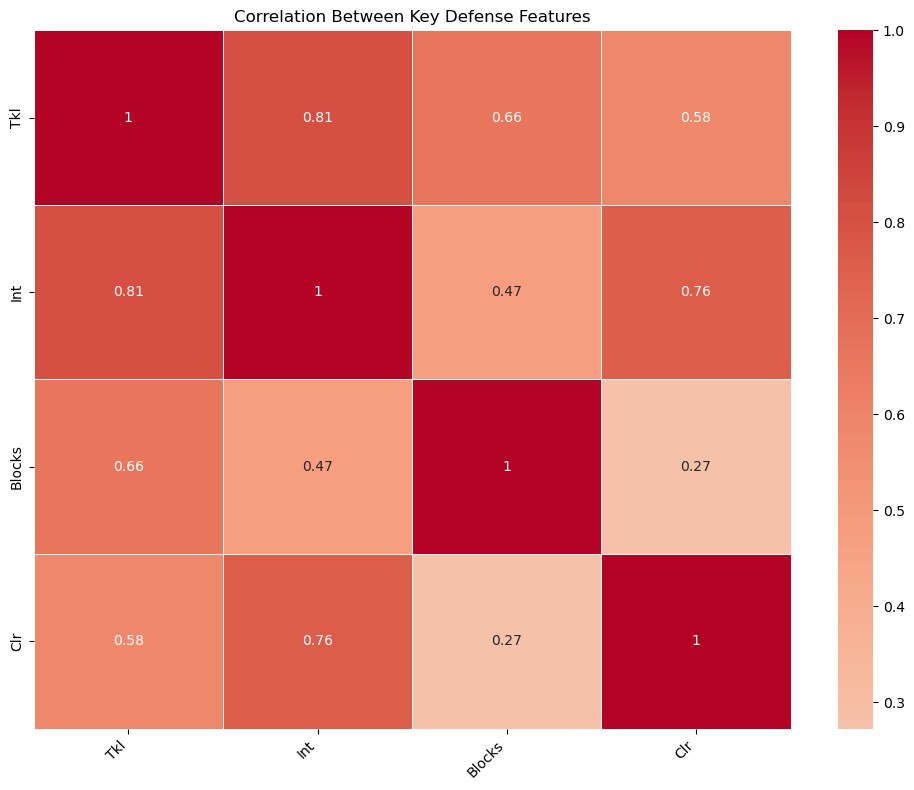

In [26]:
import pandas as pd

# Step 1: Load the original dataset
df = pd.read_csv("players_data-2024_2025(1).csv")
missing_values = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)

missing_table = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing %': missing_percent.round(2)
})

# Filter only features with missing values
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

import pandas as pd
from IPython.display import display
display(missing_table)
print(len(df))  # Check how many rows we have

# Step 2: Keep identifying info separately (for later labeling/display)
player_info = df[['Player', 'Nation', 'Pos', 'Squad']].copy()


# Step 3: Create a new dataframe with just the numeric features for PCA
df_numeric = df.select_dtypes(include='number') # Check how many numeric columns we have
df_numeric_all = df_numeric.copy()
player_info_all = player_info.copy()
# Step 4: Drop high-missing-value columns 
drop_prefixes = (
    'Rk_stats_',
    'Nation_stats_',
    'Comp_stats_',
    'Pos_stats_',
    'Age_stats_',
    'Born_stats_'
)
columns_to_drop = [col for col in df_numeric.columns if col.startswith(drop_prefixes) or col == 'Rk']
df_numeric = df_numeric.drop(columns=columns_to_drop)

df_numeric = df_numeric.dropna(thresh=len(df_numeric) -1000, axis=1)# Check how many numeric columns we have after dropping

# Step 5: Drop rows with any missing values
df_numeric = df_numeric.fillna(0)  # or use median/mean imputation
player_info = player_info.loc[df_numeric.index].reset_index(drop=True)

# Then filter out goalkeepers
player_info = player_info[player_info['Pos'].str.contains("GK") == False]
df_numeric = df_numeric.reset_index(drop=True)
df_numeric = df_numeric.loc[player_info.index]
print(len(df_numeric.columns)) 
print(len(df_numeric))  # Check how many rows we have after filtering


# Assuming df_numeric is your cleaned, unscaled numeric dataset
selected_features = [
    '90s',          # Minutes played (Involvement)
    'MP',      # Matches played (Involvement)  
    'Gls',          # Goals scored (Attacking)
    'xG',           # Expected goals (Attacking)
    'Ast',          # Assists (Creativity)
    'xA',           # Expected assists (Creativity)
    'PrgC',
    'PrgDist', # Progressive distance (Ball progression)
    'PrgP' ,        # Progressive passes (Ball progression)
    'KP',   # Key passes (Creativity)
    'Touches' ,   
    'Recov',    # Key passes (Passing)
    'Tkl',          # Tackles (Defense)
    'Int',          # Interceptions (Defense)
    'Blocks',       # Blocks (Defense)
    'Clr'        # Clearances (Defense)                                                                                               # Dribbles (Ball control)     # Involvement        # Recoveries (Ball control)
]



import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_numeric[selected_features].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Key Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Attacking Correlations
selected_featuresatt = [    # Matches played (Involvement)  
    'Gls',          # Goals scored (Attacking)
    'xG',           # Expected goals (Attacking)
    'Ast',          # Assists (Creativity)
    'xA',           # Expected assists (Creativity)
    'SoT'           # Shots on Target(Attacking)                                                                                                                                                                             # Dribbles (Ball control)     # Involvement        # Recoveries (Ball control)
]



import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_numeric[selected_featuresatt].corr()

# attack Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Key Attacking Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Passing Correlations
selected_featurespass = [
    'KP',   # Key passes (Creativity)
    'PrgC',
    'PrgDist', # Progressive distance (Ball progression)
    'PrgP' ,        # Progressive passes (Ball progression)
    'Touches' ,   
    'Recov'    # Key passes (Passing)
]

corr_matrix = df_numeric[selected_featurespass].corr()

# passing Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Key Midfield Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Defense Correlations
selected_featuresdef = [
    'Tkl',          # Tackles (Defense)
    'Int',          # Interceptions (Defense)
    'Blocks',       # Blocks (Defense)
    'Clr'        # Clearances (Defense)                                                                                               # Dribbles (Ball control)     # Involvement        # Recoveries (Ball control)
]      

corr_matrix = df_numeric[selected_featuresdef].corr()
# Defense Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Key Defense Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

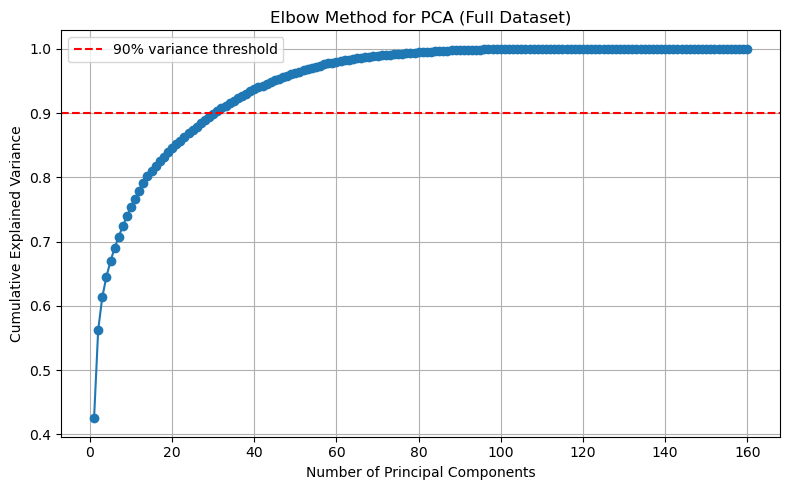

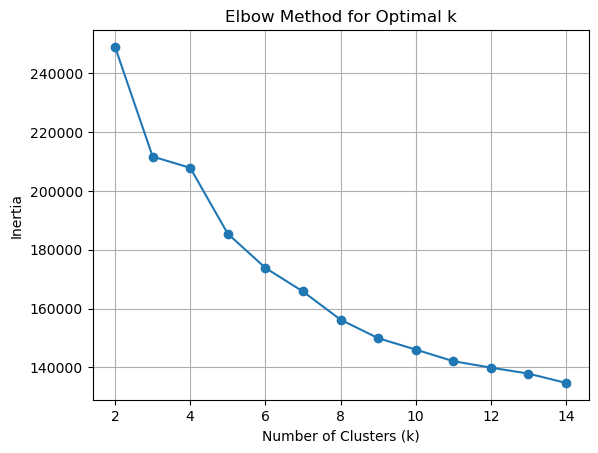


Best k by elbow method: 5


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scale the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Step 2: Fit PCA on the scaled dataset
pca = PCA()
pca.fit(X_scaled)

# Step 3: Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for PCA (Full Dataset)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

pca = PCA(n_components=31)
X_pca = pca.fit_transform(X_scaled)



import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def find_best_k_by_inertia(X_pca, k_range=range(2, 15)):
    inertias = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_pca)
        inertias.append(kmeans.inertia_)

    # Plot the inertia curve
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    # Automatically find elbow (max second derivative method)
    inertia_array = np.array(inertias)
    first_derivative = np.diff(inertia_array)
    second_derivative = np.diff(first_derivative)

    # Add +2 to align with k_range because of double diff
    elbow_k = k_range[np.argmin(second_derivative) + 2]

    print(f"\nBest k by elbow method: {elbow_k}")
    return elbow_k

best_k = find_best_k_by_inertia(X_pca, k_range=range(2, 15))


In [28]:
from sklearn.cluster import KMeans

# Use best_k from elbow method
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

player_info['Cluster'] = cluster_labels



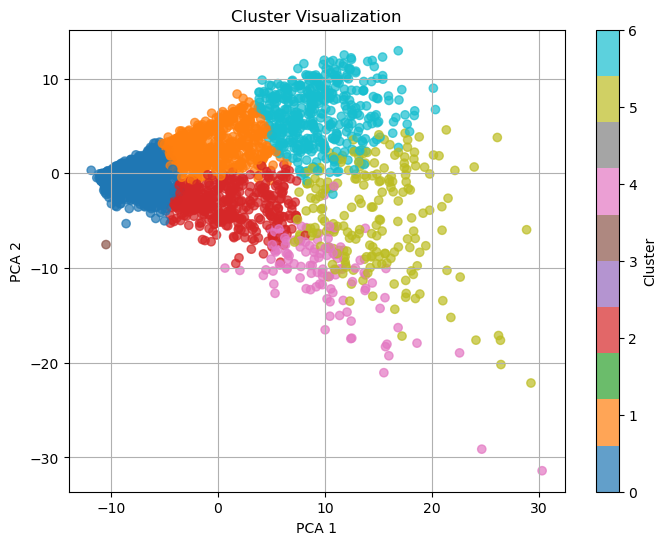

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_clusters_2D(X_pca, labels, info_table, title="Cluster Visualization (2D)"):
    pca_2d = PCA(n_components=2)
    reduced = pca_2d.fit_transform(X_pca)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_clusters_2D(X_pca, cluster_labels, player_info, title="Cluster Visualization")

In [30]:

from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
filtered_info = player_info[player_info['Pos'].str.contains("MF|FW|DF", case=False)]
filtered_pca = X_pca[player_info.index.get_indexer(filtered_info.index)]


def find_similar_players(player_name, info, X_pca,
                         pos_filter="MF|FW|DF", top_n=20):
    # Get the vector of the target player from train set
    target = player_info[player_info['Player'].str.contains(player_name, case=False)]
    if target.empty:
        print("Player not found!")
        return
    
    # Find the relative position inside the DataFrame
    relative_index = player_info.index.get_loc(target.index[0])
    vector = X_pca[relative_index]

    # Filter test set by position
    # Step 1. Get the position of the target player
    target_pos = target['Pos'].values[0]  # e.g., 'MF', 'DF', or 'MF,FW'

# Step 2. Build a regex pattern to include all position codes
# For example: 'MF,FW' → 'MF|FW'
    pos_pattern = '|'.join([pos.strip() for pos in target_pos.split(',')])

# Step 3. Filter test set based on that pattern
    filtered_test = player_info[player_info['Pos'].str.contains(pos_pattern, case=False, na=False)]
    filtered_test_pca = X_pca[player_info.index.get_indexer(filtered_test.index)]

    # Find closest players
    # Find closest players (excluding the player themself)
    distances = cosine_distances(filtered_test_pca, [vector]).ravel()

    # Get the indices sorted by similarity (lowest distance first)
    sorted_indices = distances.argsort()

    # Get the index of the target player in the filtered set
    target_index_in_filtered = filtered_test.index.get_indexer([target.index[0]])[0]

    # Remove the target player's own index
    sorted_indices = sorted_indices[sorted_indices != target_index_in_filtered]

    # Then select top_n players
    closest_indices = sorted_indices[:top_n]
    similar_players = filtered_test.iloc[closest_indices]

    
    
    return similar_players[['Player', 'Pos','Squad', 'Cluster']]






In [36]:
find_similar_players("Nico Williams", player_info, X_pca,)

,Player,Pos,Squad,Cluster
1002,Bryan Gil,"FW,MF",Girona,2
2242,Rodrygo,"FW,MF",Real Madrid,5
757,Jeremy Doku,"FW,MF",Manchester City,5
2792,Lamine Yamal,FW,Barcelona,5
1756,Yankuba Minteh,"FW,MF",Brighton,5
2823,Bryan Zaragoza,"FW,MF",Osasuna,5
1220,Gustav Isaksen,FW,Lazio,5
2799,Kenan Yıldız,"FW,MF",Juventus,5
985,Yann Gboho,"MF,FW",Toulouse,5
1795,Raúl Moro,"MF,FW",Valladolid,5
